In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import zipfile
zip = zipfile.ZipFile("/content/drive/MyDrive/face_mask_detection.v4i.yolov11.zip")

In [ ]:
zip.extractall()

In [ ]:
!pip install -U ultralytics # This installs YOLOv8, YOLO9, YOLO10, YOLO11 automatically.

In [ ]:
from ultralytics import YOLO
import os

In [ ]:
model = YOLO("yolo11n.pt")  # This is pre-trained on COCO, so we are fine-tuning.

In [ ]:
pred = model.predict("/content/download.jpg")

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 211, 203],
        [255, 211, 203],
        [255, 213, 205]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255,  42,   4],
        [255,  42,   4],
        [255,  42,   4]],

       ...,

       [[255, 255, 255],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [116, 116, 116],
        [254, 254, 254],
        [255, 255, 255]],

       [[255, 255, 255],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [116, 116, 116],
        [254, 254, 254],
        [255, 255, 255]],

       [[255, 255, 255],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [116, 116, 116],
        [254, 254, 254],
        [255, 255, 255]]], dtype=uint8)
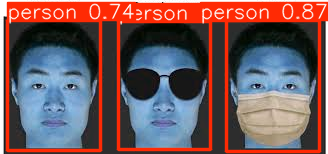

In [32]:
pred[0].plot()

In [9]:
# Fine Tuning
model.train(
    data="/content/data.yaml",
    epochs=20,
    imgsz=640,
    batch=16
)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x794c3ae18440>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [10]:
model.val()

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 500.8±173.9 MB/s, size: 22.7 KB)
val: Scanning /content/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 60/60 71.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 2.8s/it 11.4s
                   all         60        154      0.871      0.778      0.864      0.639
                  mask         52        134      0.891      0.856      0.933      0.665
                nomask         15         20      0.851        0.7      0.795      0.613
Speed: 2.6ms preprocess, 173.2ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to /content/runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x794c3206cd70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [35]:
model = YOLO("/content/runs/detect/train/weights/best.pt")


In [33]:
!pip install opencv-python

WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.12/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.12/dist-packages/ultralytics/assets/bus.jpg: 640x480 1 nomask, 179.6ms
image 2/2 /usr/local/lib/python3.12/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 masks, 149.7ms
Speed: 4.7ms preprocess, 164.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


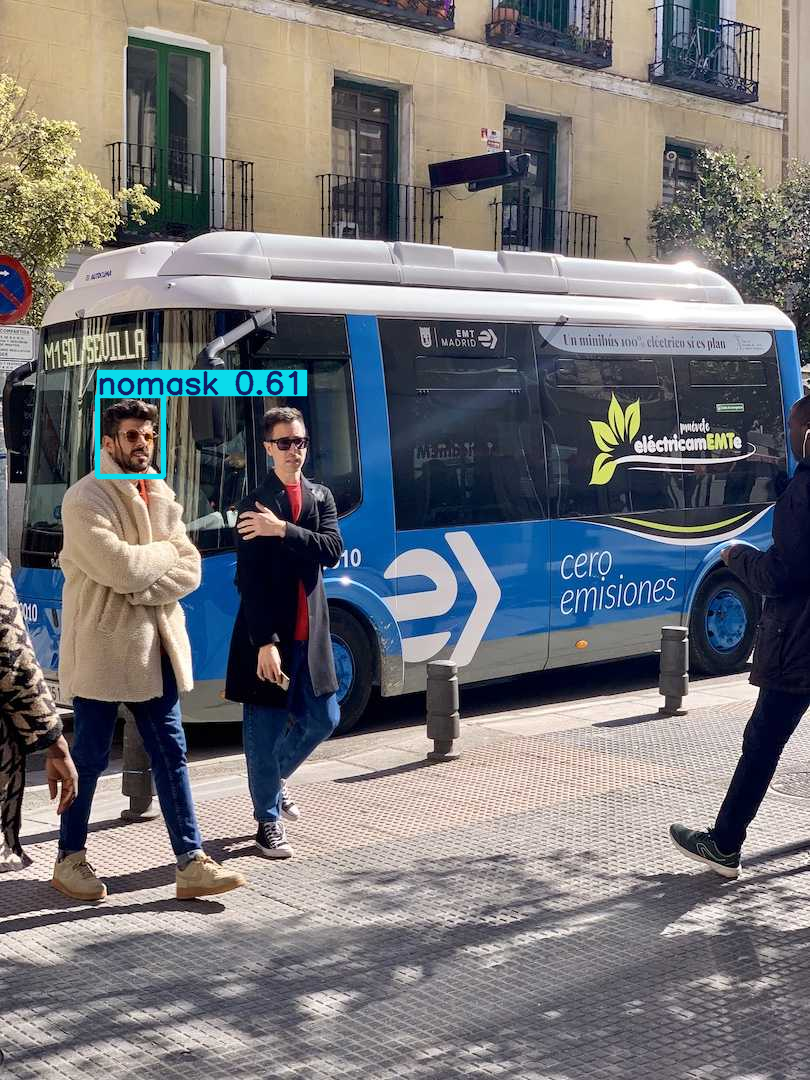

In [40]:
from google.colab.patches import cv2_imshow
import cv2

img_path = "/content/test/images/sample.jpg"  # your image
img = cv2.imread(img_path)

results = model.predict(img, conf=0.4)
annotated = results[0].plot()

cv2_imshow(annotated)

In [42]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model.predict(frame, conf=0.4)
    annotated = results[0].plot()

    cv2.imshow("Face Mask Detection", annotated)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
